In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
data = ascii.read('exodata.tbl')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


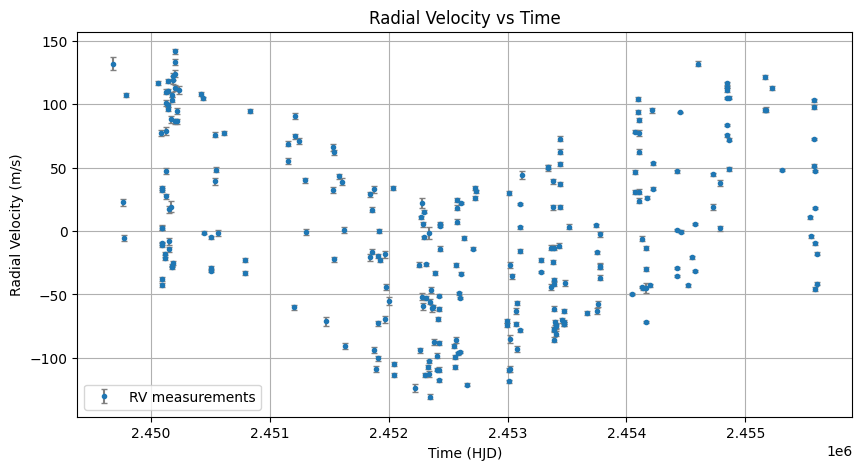

In [3]:
time = data['HJD']
rv = data['Radial_Velocity']
rv_err = data['Radial_Velocity_Uncertainty']

plt.figure(figsize=(10, 5))
plt.errorbar(time, rv, yerr=rv_err, fmt='o', ecolor='gray', capsize=2, markersize=3, label='RV measurements')
plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Radial Velocity vs Time")
plt.grid(True)
plt.legend()

plt.savefig("rv_data_plot.pdf")

plt.show()

In [4]:
def sinusoid(t, K, P, phi, offset):
    return K * np.sin(2 * np.pi * t / P + phi) + offset

Best-fit parameters: K = 47.92 m/s, P = 4807.13 days, phi = -493.04 rad, offset = -1.42 m/s


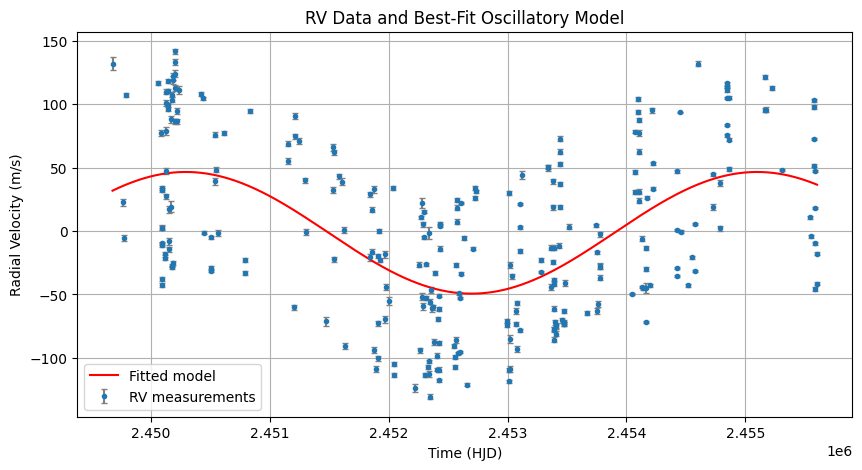

In [5]:
# completely random gueses
K_guess = ((np.max(rv) - np.min(rv)) / 2)
period_guess = np.max(time) - np.min(time)
offset_guess = np.mean(rv)


initial_guess = [K_guess, period_guess, 0, offset_guess]

popt, pcov = curve_fit(sinusoid, time, rv, sigma=rv_err, absolute_sigma=True, p0=initial_guess)
K_fit, P_fit, phi_fit, offset_fit = popt

print(f"Best-fit parameters: K = {K_fit:.2f} m/s, P = {P_fit:.2f} days, phi = {phi_fit:.2f} rad, offset = {offset_fit:.2f} m/s")

t_fit = np.linspace(min(time), max(time), 1000)
rv_fit = sinusoid(t_fit, *popt)

plt.figure(figsize=(10, 5))
plt.errorbar(time, rv, yerr=rv_err, fmt='o', ecolor='gray', capsize=2, markersize=3, label='RV measurements')
plt.plot(t_fit, rv_fit, 'r-', label='Fitted model')
plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("RV Data and Best-Fit Oscillatory Model")
plt.grid(True)
plt.legend()

plt.savefig("rv_fit_model.pdf")
plt.show()